<a href="https://colab.research.google.com/github/pedrostrepeckes/TCC/blob/master/tcc_lenet5_arch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LeNet5

In [0]:
import tensorflow as tf
import keras
import gc
from keras import optimizers
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, Conv1D, Dense, Flatten, MaxPooling2D, Dropout, AveragePooling2D
from keras.callbacks import LearningRateScheduler, TensorBoard
import matplotlib.pyplot as plt
import random
import time
from google.colab import drive
from scipy import stats
import pandas as pd

drive.mount('/content/gdrive')

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Using TensorFlow backend.


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Found GPU at: /device:GPU:0


In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Definicoes

---



In [0]:
epoch1 = 60
epoch2 = 60
epoch3 = 60
images_path = '/content/gdrive/My Drive/TCC/tcc_uergs/codigos/Redes/LeNet5/arch_mod/'
size_batch = 128

In [0]:
def build_model1():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def build_model2():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model
  
def build_model3():
    model = Sequential()
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal', input_shape=(32,32,3)))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(1, 1)))
    model.add(Conv2D(6, (5, 5), padding='valid', activation = 'relu', kernel_initializer='he_normal'))
    model.add(MaxPooling2D((2, 2), strides=(1, 1)))
    model.add(Flatten())
    model.add(Dense(120, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(84, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    sgd = optimizers.SGD(lr=.1, momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

def scheduler1(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001
  
def scheduler2(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

def scheduler3(epoch):
    if epoch < 30:
      return 0.01
    if epoch < 50:
      return 0.001
    if epoch < 100:
      return 0.0001
    return 0.001

# Preprocessing

In [0]:
print(x_train.mean())
mean = {}
mean[0] = x_train[:,:,:,0].mean()
mean[1] = x_train[:,:,:,1].mean()
mean[2] = x_train[:,:,:,2].mean()

print(x_train.std())
std = {}
std[0] = x_train[:,:,:,0].std()
std[1] = x_train[:,:,:,1].std()
std[2] = x_train[:,:,:,2].std()

#for i in range(3):
#        x_train[:,:,:,i] = (x_train[:,:,:,i] - mean[i]) / std[i]
#        x_test[:,:,:,i] = (x_test[:,:,:,i] - mean[i]) / std[i]


#uma imagem
#x_train[1,:,:,:].size
#x_train[1,:,:,:]


120.70756512369792
64.1500758911213


In [0]:
Y_test = y_test
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0

print(x_test.mean)
#df_x_test = pd.DataFrame( data=x_test[1:,1:], index=x_test[1:,0], columns=x_test[0,1:] )

# build network
model_lr1 = build_model1()
model_lr2 = build_model2()
model_lr3 = build_model3()
print(model_lr1.summary())

# set callback
#tb_cb = TensorBoard(log_dir='./lenet', histogram_freq=0)
change_lr1 = LearningRateScheduler(scheduler1)
change_lr2 = LearningRateScheduler(scheduler2)
change_lr3 = LearningRateScheduler(scheduler3)
#cbks = [change_lr,tb_cb]
cbks1 = [change_lr1]
cbks2 = [change_lr2]
cbks3 = [change_lr3]

#plt.imshow(x_test[random.randint(1, 10000)])

<built-in method mean of numpy.ndarray object at 0x7fcb6be33ee0>
Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         456       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               141240    
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                850       
Total

In [0]:
# start train
start = time.time()
history = {}
history[0] = model_lr1.fit(x_train, y_train,
                           batch_size=size_batch,
                           epochs=epoch1,
                           callbacks=cbks1,
                           validation_data=(x_test, y_test),
                           shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 4s 85us/step - loss: 1.8755 - acc: 0.3189 - val_loss: 1.5998 - val_acc: 0.4258
Epoch 2/60
50000/50000 [==============================] - 2s 47us/step - loss: 1.5224 - acc: 0.4569 - val_loss: 1.5104 - val_acc: 0.4491
Epoch 3/60
50000/50000 [==============================] - 2s 46us/step - loss: 1.4179 - acc: 0.4954 - val_loss: 1.4867 - val_acc: 0.4767
Epoch 4/60
50000/50000 [==============================] - 2s 47us/step - loss: 1.3462 - acc: 0.5221 - val_loss: 1.4395 - val_acc: 0.4840
Epoch 5/60
50000/50000 [==============================] - 2s 47us/step - loss: 1.2836 - acc: 0.5427 - val_loss: 1.3918 - val_acc: 0.5053
Epoch 6/60
50000/50000 [==============================] - 3s 51us/step - loss: 1.2205 - acc: 0.5675 - val_loss: 1.3512 - val_acc: 0.5250
Epoch 7/60
50000/50000 [==============================] - 3s 53us/step - loss: 1

In [0]:
start = time.time()
history[1] = model_lr2.fit(x_train, y_train,
                        batch_size=size_batch,
                        epochs=epoch2,
                        callbacks=cbks2,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))


Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 3s 57us/step - loss: 1.8576 - acc: 0.3182 - val_loss: 1.5823 - val_acc: 0.4154
Epoch 2/60
50000/50000 [==============================] - 3s 51us/step - loss: 1.5110 - acc: 0.4511 - val_loss: 1.4551 - val_acc: 0.4705
Epoch 3/60
50000/50000 [==============================] - 3s 51us/step - loss: 1.3922 - acc: 0.4996 - val_loss: 1.3587 - val_acc: 0.5104
Epoch 4/60
50000/50000 [==============================] - 3s 51us/step - loss: 1.3016 - acc: 0.5350 - val_loss: 1.3211 - val_acc: 0.5274
Epoch 5/60
50000/50000 [==============================] - 3s 52us/step - loss: 1.2389 - acc: 0.5603 - val_loss: 1.2515 - val_acc: 0.5541
Epoch 6/60
50000/50000 [==============================] - 3s 52us/step - loss: 1.1853 - acc: 0.5796 - val_loss: 1.2369 - val_acc: 0.5631
Epoch 7/60
50000/50000 [==============================] - 3s 51us/step - loss: 1.1425 - acc: 0.5966 - val_loss: 1.1861 - val_acc

In [0]:

start = time.time()
history[2] = model_lr3.fit(x_train, y_train,
                        batch_size=size_batch,
                        epochs=epoch3,
                        callbacks=cbks3,
                        validation_data=(x_test, y_test),
                        shuffle=True)
end = time.time()
tempo_dec = end - start
print('Tempo em segundos: '+ str(tempo_dec))

Train on 50000 samples, validate on 10000 samples
Epoch 1/60
50000/50000 [==============================] - 3s 62us/step - loss: 2.2997 - acc: 0.1028 - val_loss: 2.3027 - val_acc: 0.1002
Epoch 2/60
50000/50000 [==============================] - 3s 55us/step - loss: 2.3020 - acc: 0.1027 - val_loss: 2.3029 - val_acc: 0.1001
Epoch 3/60
50000/50000 [==============================] - 3s 54us/step - loss: 2.3029 - acc: 0.0996 - val_loss: 2.3029 - val_acc: 0.1001
Epoch 4/60
50000/50000 [==============================] - 3s 55us/step - loss: 2.3029 - acc: 0.0990 - val_loss: 2.3030 - val_acc: 0.1001
Epoch 5/60
50000/50000 [==============================] - 3s 55us/step - loss: 2.3029 - acc: 0.0998 - val_loss: 2.3028 - val_acc: 0.1001
Epoch 6/60
50000/50000 [==============================] - 3s 55us/step - loss: 2.3029 - acc: 0.0988 - val_loss: 2.3028 - val_acc: 0.1001
Epoch 7/60
50000/50000 [==============================] - 3s 54us/step - loss: 2.3029 - acc: 0.0989 - val_loss: 2.3027 - val_acc

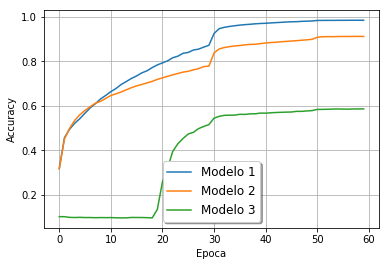

In [0]:
model_lr1.save(images_path + 'lenet1.h5')
model_lr2.save(images_path + 'lenet2.h5')
model_lr3.save(images_path + 'lenet3.h5')
fig, ax = plt.subplots()
ax.plot(history[0].history['acc'], label='Modelo 1')
ax.plot(history[1].history['acc'], label='Modelo 2')
ax.plot(history[2].history['acc'], label='Modelo 3')

legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy')
plt.savefig(images_path + 'metric_var_lr_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

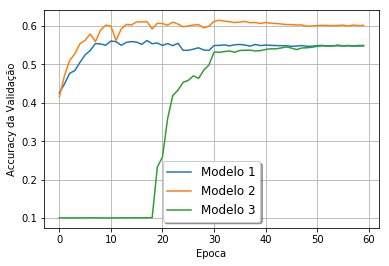

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], label='Modelo 1')
ax.plot(history[1].history['val_acc'], label='Modelo 2')
ax.plot(history[2].history['val_acc'], label='Modelo 3')


legend = ax.legend(loc='lower center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Accuracy da Validação')
plt.savefig(images_path + 'metric_var_lr_val_accuracy.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

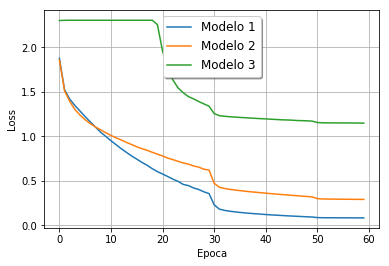

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['loss'], label='Modelo 1')
ax.plot(history[1].history['loss'], label='Modelo 2')
ax.plot(history[2].history['loss'], label='Modelo 3')


legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss')
plt.savefig(images_path + 'metric_var_lr_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

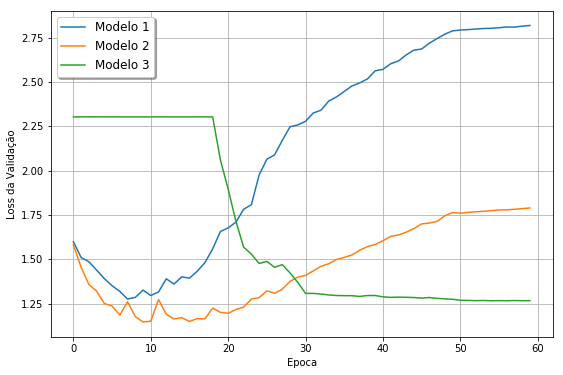

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_loss'], label='Modelo 1')
ax.plot(history[1].history['val_loss'], label='Modelo 2')
ax.plot(history[2].history['val_loss'], label='Modelo 3')

chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height*1.5])

legend = ax.legend(loc='upper left', shadow=True, fontsize='large')
plt.xlabel('Epoca')
plt.ylabel('Loss da Validação')
plt.savefig(images_path + 'metric_var_lr_val_loss.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

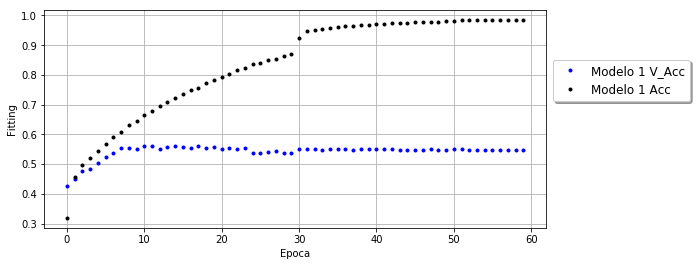

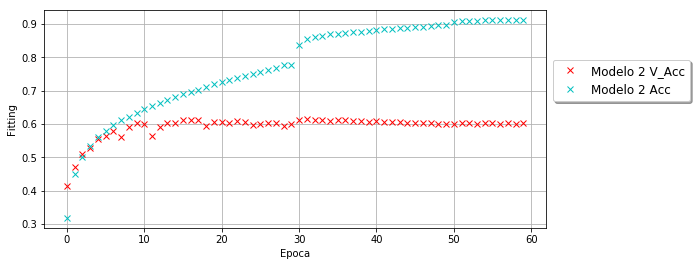

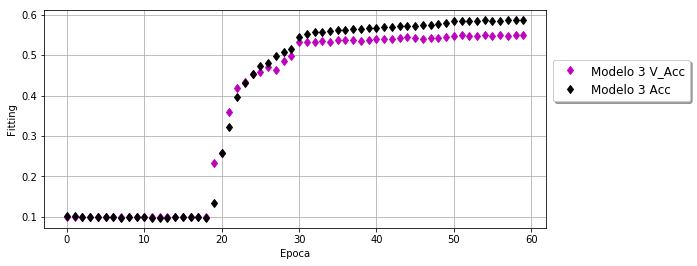

In [0]:
fig, ax = plt.subplots()
ax.plot(history[0].history['val_acc'], '.',color = 'b', label='Modelo 1 V_Acc')
ax.plot(history[0].history['acc'], '.', color = 'k', label='Modelo 1 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting1.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[1].history['val_acc'], 'x',color = 'r', label='Modelo 2 V_Acc')
ax.plot(history[1].history['acc'], 'x',color = 'c', label='Modelo 2 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting2.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()

fig, ax = plt.subplots()
ax.plot(history[2].history['val_acc'], 'd',color = 'm', label='Modelo 3 V_Acc')
ax.plot(history[2].history['acc'], 'd',color = 'k', label='Modelo 3 Acc')
chartBox = ax.get_position()
ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*1.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large',bbox_to_anchor=(1.15, 0.8))
plt.xlabel('Epoca')
plt.ylabel('Fitting')
plt.savefig(images_path + 'metric_var_lr_fitting3.png', bbox_inches='tight', dpi=1000)
plt.grid(True)
plt.show()


#Metricas

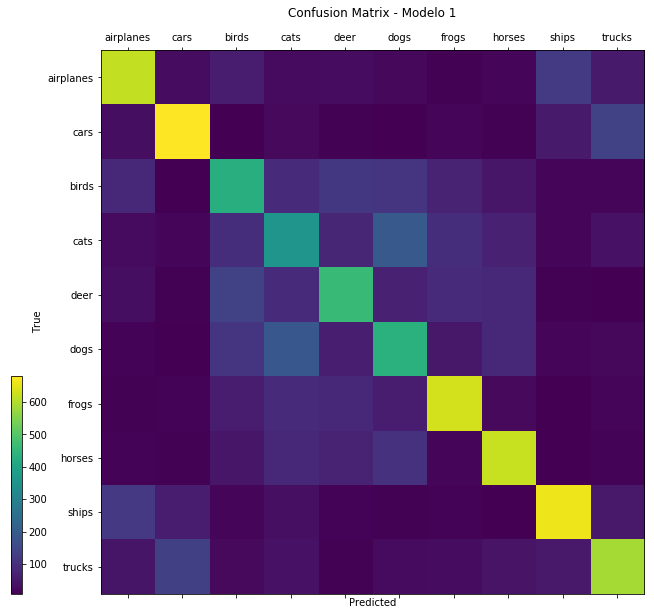

In [0]:
Y_pred1 = model_lr1.predict(x_test)

import numpy as np
y_pred1 = np.argmax(Y_pred1, axis=1)
#print (y_pred1)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
#labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
cm = skmetrics.confusion_matrix(Y_test, y_pred1)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 1')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'metric_var_lr_cm_model1_.png', bbox_inches='tight', dpi=1000)
plt.show()

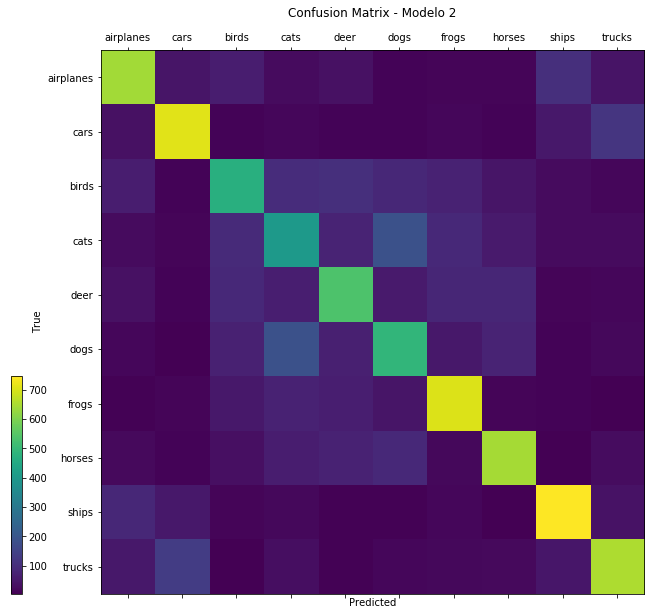

In [0]:
Y_pred2 = model_lr2.predict(x_test)

import numpy as np
y_pred2 = np.argmax(Y_pred2, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred2)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 2')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model2_.png', bbox_inches='tight', dpi=1000)
plt.show()

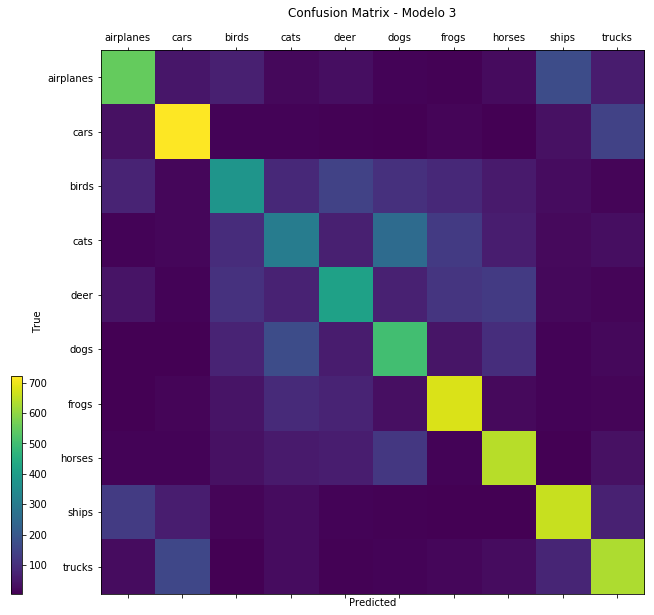

In [0]:
Y_pred3 = model_lr3.predict(x_test)

import numpy as np
y_pred3 = np.argmax(Y_pred3, axis=1)
#print (y_pred2)
Y_test = np.reshape(Y_test, len(Y_test))
#print (Y_test)

import sklearn.metrics as skmetrics
labels = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
cm = skmetrics.confusion_matrix(Y_test, y_pred3)
#print(cm)
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion Matrix - Modelo 3')
fig.colorbar(cax)
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_position([chartBox.x0*2.5, chartBox.y0, chartBox.width*2.5, chartBox.height*2.5])
ax.set( xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(images_path + 'train_history_cm_model3_.png', bbox_inches='tight', dpi=1000)
plt.show()

In [0]:
precision = {}
recall = {}
fbeta_score = {}
support = {}
precision[0], recall[0], fbeta_score[0], support[0] = skmetrics.precision_recall_fscore_support(Y_test, y_pred1)
precision[1], recall[1], fbeta_score[1], support[1] = skmetrics.precision_recall_fscore_support(Y_test, y_pred2)
precision[2], recall[2], fbeta_score[2], support[2] = skmetrics.precision_recall_fscore_support(Y_test, y_pred3)


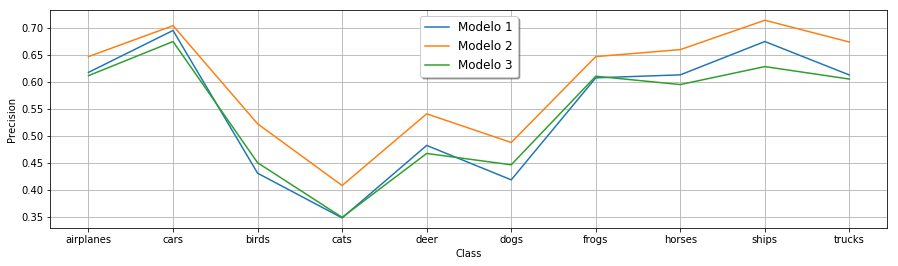

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,precision[0], label='Modelo 1')
ax.plot(labels,precision[1], label='Modelo 2')
ax.plot(labels,precision[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Precision')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_precision_.png', bbox_inches='tight', dpi=1000)
plt.show()

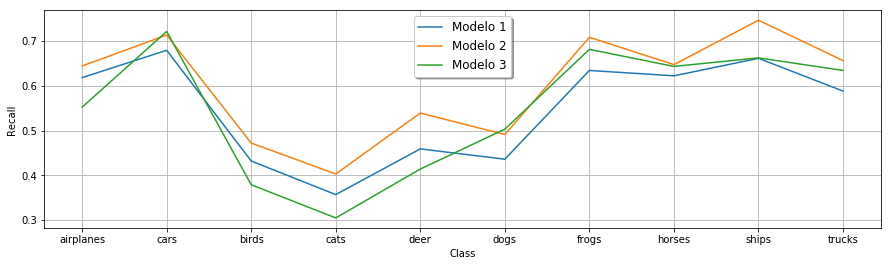

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,recall[0], label='Modelo 1')
ax.plot(labels,recall[1], label='Modelo 2')
ax.plot(labels,recall[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('Recall')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_recall_.png', bbox_inches='tight', dpi=1000)
plt.show()

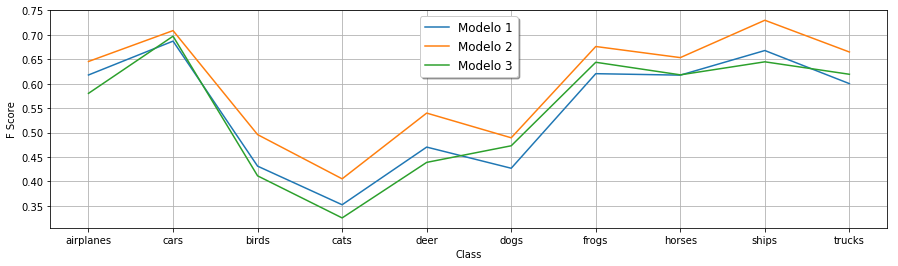

In [0]:
fig, ax = plt.subplots()
ax.plot(labels,fbeta_score[0], label='Modelo 1')
ax.plot(labels,fbeta_score[1], label='Modelo 2')
ax.plot(labels,fbeta_score[2], label='Modelo 3')

ax.set_position([chartBox.x0, chartBox.y0, chartBox.width*2.5, chartBox.height])
legend = ax.legend(loc='upper center', shadow=True, fontsize='large')
plt.xlabel('Class')
plt.ylabel('F Score')
plt.grid(True)
plt.savefig(images_path + 'metric_var_lr_fscore.png', bbox_inches='tight', dpi=1000)
plt.show()

In [0]:
print('Modelo 1 \n')
print('accuracy ' + str(history[0].history['acc'][-1]))
print('validation accuracy ' + str(history[0].history['val_acc'][-1]))
print('loss ' + str(history[0].history['loss'][-1]))
print('validation loss ' + str(history[0].history['val_loss'][-1]))

Modelo 1 

accuracy 0.98382
validation accuracy 0.5486
loss 0.08503071338653564
validation loss 2.8178063766479493


In [0]:
print('Modelo 2 \n')
print('accuracy ' + str(history[1].history['acc'][-1]))
print('validation accuracy ' + str(history[1].history['val_acc'][-1]))
print('loss ' + str(history[1].history['loss'][-1]))
print('validation loss ' + str(history[1].history['val_loss'][-1]))

Modelo 2 

accuracy 0.9112000000381469
validation accuracy 0.6019
loss 0.2926966232204437
validation loss 1.789661033630371


In [0]:
print('Modelo 3 \n')
print('accuracy ' + str(history[2].history['acc'][-1]))
print('validation accuracy ' + str(history[2].history['val_acc'][-1]))
print('loss ' + str(history[2].history['loss'][-1]))
print('validation loss ' + str(history[2].history['val_loss'][-1]))

Modelo 3 

accuracy 0.5861999999809265
validation accuracy 0.5494
loss 1.1487351440048217
validation loss 1.2673517009735107
